# 编程练习3：多分类及神经网络

In [49]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat
from random import sample
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cg
from scipy.special import expit

In [50]:
raw_data = loadmat('ex3data1.mat')
X = np.mat(raw_data['X'])
y = np.mat(raw_data['y'])
m = len(y)

# 1 多分类
这一章我们对手写数字进行识别。
## 1.2 可视化
我们此采用画子图的方式，随机选100张图，画在10*10的子图上。

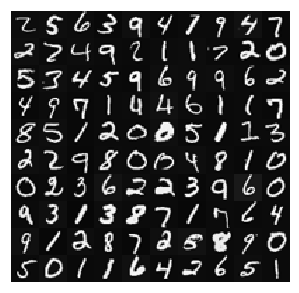

In [4]:
fig = plt.figure(figsize=(5,5))
sample_num = 100
idx = sample(range(0,m), sample_num)
for i in range(0, sample_num):
    plt.subplot(10, 10, i+1)
    plt.imshow(X[idx[i],:].reshape((20,20)).T, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

### 1.3 向量化逻辑回归
我们在ex2中就已经做了向量化的表示。这里直接给出，不再解释。
#### 1.3.1 向量化代价函数

In [5]:
def cost(x, *args):
    X, y = args
    theta = np.mat(x).reshape((X.shape[1],1))
    h_theta = expit(X*theta)
    J = (-np.log(h_theta.T)*y - np.log(1-h_theta).T*(1-y))/len(y)
    return J[0,0]

#### 1.3.2 向量化梯度

In [6]:
def grad(x, *args):
    X, y = args
    theta = np.mat(x).reshape((X.shape[1],1))
    h_theta = expit(X*theta)
    g = X.T*(h_theta-y)/len(y)
    return np.asarray(g).reshape(X.shape[1])

#### 1.3.3 向量化正则化逻辑回归

In [7]:
def costReg(x, *args):
    X, y, lamda = args    
    J = cost(x, X, y)
    theta = np.mat(x.copy()).reshape((X.shape[1],1))
    theta[0,0] = 0
    J += lamda/(2*len(y))*theta.T*theta
    return J[0,0]
def gradReg(x, *args):
    X, y, lamda = args
    g = grad(x, X, y)
    theta = np.asarray(x.copy()).reshape(X.shape[1])
    theta[0] = 0
    g += lamda/len(y)*theta
    return g

最后我们测试一下：

In [8]:
theta_t = np.mat([-2,-1,1,2]).reshape((4,1))
X_t = np.concatenate((np.ones((1,5)), np.linspace(0.1,1.5,15).reshape((3,5)))).T
y_t = np.mat([1,0,1,0,1]).reshape((5,1))
lamda_t = 3
J = costReg(theta_t, X_t, y_t, lamda_t)
g = gradReg(theta_t, X_t, y_t, lamda_t)
print('Cost: %s\tExpected: 2.534819' % J)
print('Grad: %s\tExpected: [0.146561 -0.548558 0.724722 1.398003]' % g)

Cost: 2.534819396109744	Expected: 2.534819
Grad: [ 0.14656137 -0.54855841  0.72472227  1.39800296]	Expected: [0.146561 -0.548558 0.724722 1.398003]


### 1.4 一对多分类


In [40]:
X = np.column_stack([np.ones((m,1)), np.mat(raw_data['X'])])
lamda = 0.1
x0 = np.zeros(X.shape[1])
all_theta = []
for i in range(1, 11):
    yi = np.where(y==i, 1, 0)
    all_theta.append(fmin_cg(costReg, x0, gradReg, args=(X,yi,lamda)))
all_theta = np.mat(all_theta)

Optimization terminated successfully.
         Current function value: 0.013122
         Iterations: 107
         Function evaluations: 413
         Gradient evaluations: 413
Optimization terminated successfully.
         Current function value: 0.050806
         Iterations: 261
         Function evaluations: 798
         Gradient evaluations: 798
Optimization terminated successfully.
         Current function value: 0.057607
         Iterations: 238
         Function evaluations: 699
         Gradient evaluations: 699
Optimization terminated successfully.
         Current function value: 0.033098
         Iterations: 143
         Function evaluations: 466
         Gradient evaluations: 466
Optimization terminated successfully.
         Current function value: 0.054474
         Iterations: 209
         Function evaluations: 617
         Gradient evaluations: 617
Optimization terminated successfully.
         Current function value: 0.018277
         Iterations: 112
         Function ev

#### 1.4.1 一对多预测
得到all_theta之后，我们将预测结果与真实值进行比对，计算准确率。

In [34]:
predict = np.argmax(expit(X*all_theta.T), axis=1)
accuracy = np.count_nonzero(predict == y-1) / m
print('准确率： %s' % accuracy)

准确率： 0.9646


## 2 神经网络
### 2.2 前向传播及预测

In [45]:
raw_theta = loadmat('ex3weights.mat')
Theta1 = np.mat(raw_theta['Theta1'])
Theta2 = np.mat(raw_theta['Theta2'])
a1 = expit(X * Theta1.T)
a1 = np.column_stack([np.ones((m,1)), a1])
a2 = expit(a1 * Theta2.T)
predict = np.argmax(a2, axis=1)
accuracy = np.count_nonzero(predict == y-1) / m
print('准确率： %s' % accuracy)

准确率： 0.9752
